# Distribuição Conjunta - variáveis discretas (1o exemplo)

1. **Geração dos Dados**:
   - $X$ é uma variável aleatória que segue uma distribuição normal padrão (média 0, desvio padrão 1).
   - $Y$ é gerado como $Y = 2X + \epsilon$, onde $\epsilon$ é um termo de erro que também segue uma distribuição normal padrão. Isso cria uma relação linear entre $X$ e $Y$, com alguma variabilidade adicional.

2. **Visualização da Distribuição Conjunta**:
   - O gráfico de dispersão mostra as amostras da distribuição conjunta das variáveis $X$ e $Y$. A forma do gráfico reflete a relação linear entre $X$ e $Y$.

3. **Matriz de Covariância**:
   - A matriz de covariância $\text{Cov}(X, Y)$ quantifica a relação entre as variáveis. Se os valores da covariância forem positivos, como neste caso, isso indica que $X$ e $Y$ aumentam juntos.

O código abaixo gera um gráfico de dispersão mostrando a relação entre $X$ e $Y$.


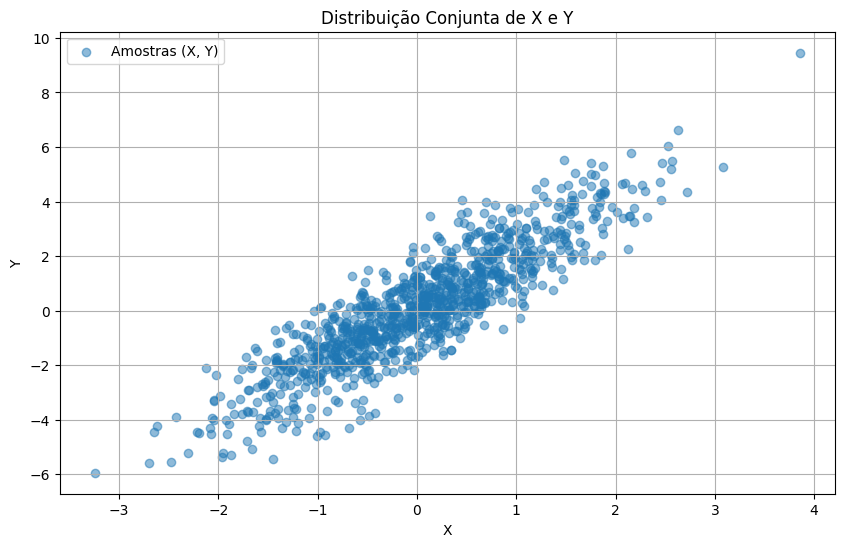

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Definindo o número de amostras
n = 1000

# Gerando dados para X e Y
np.random.seed(42)  # Para reprodutibilidade
X = np.random.normal(loc=0, scale=1, size=n)
Y = 2 * X + np.random.normal(loc=0, scale=1, size=n)

# Visualizando a distribuição conjunta
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, alpha=0.5, label='Amostras (X, Y)')
plt.title('Distribuição Conjunta de X e Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()


# Distribuição conjunta - variáveis discretas (2o exemplo)

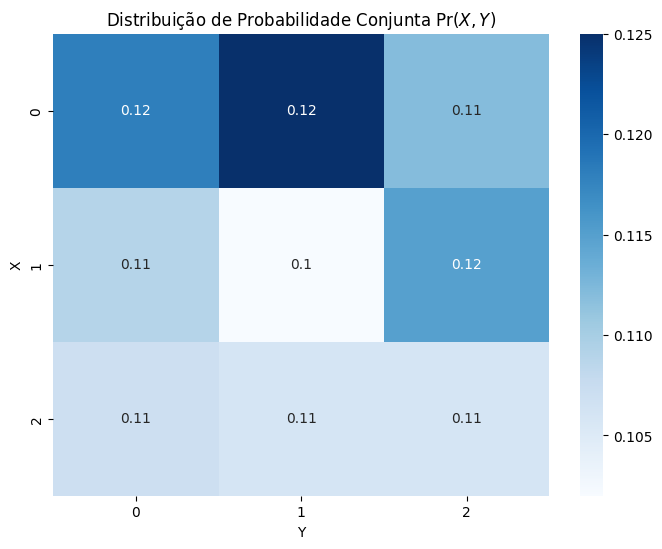

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Definindo as variáveis aleatórias X e Y
np.random.seed(42)
n_samples = 1000
X = np.random.randint(0, 3, n_samples)
Y = np.random.randint(0, 3, n_samples)

# Calculando a distribuição conjunta usando a função Counter
joint_distribution = Counter(zip(X, Y))

# Normalizando para obter a distribuição de probabilidade conjunta
total_samples = sum(joint_distribution.values())
for key in joint_distribution:
    joint_distribution[key] /= total_samples

# Exibindo a distribuição conjunta em forma de matriz
joint_matrix = np.zeros((3, 3))
for (x, y), prob in joint_distribution.items():
    joint_matrix[x, y] = prob

# Visualizando a distribuição conjunta
plt.figure(figsize=(8, 6))
sns.heatmap(joint_matrix, annot=True, cmap="Blues", xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.title("Distribuição de Probabilidade Conjunta $\Pr(X, Y)$")
plt.xlabel("Y")
plt.ylabel("X")
plt.show()


In [10]:
joint_matrix

array([[0.118, 0.125, 0.112],
       [0.109, 0.102, 0.115],
       [0.107, 0.106, 0.106]])

# Distribuição Conjunta - variáveis contínuas

O código na célula a seguir gera um gráfico 3D que mostra a superfície da distribuição conjunta de altura e peso. Regiões mais altas indicam combinações de altura e peso mais prováveis na população simulada.

1. Parâmetros da Distribuição: Definimos as médias ($\mu_𝑋$ e $\mu_Y$), os desvios padrão ($\sigma_𝑋$ e $\sigma_Y$) e o coeficiente de correlação ($\rho$) entre altura e peso:

2. Matriz de Covariância: Criamos a matriz de covariância que descreve a relação entre altura e peso.

3. Grade de Valores para $𝑋$ e $𝑌$: Geramos uma grade de valores possíveis para $𝑋$ (altura) e $𝑌$ (peso) para calcular a densidade conjunta em cada ponto dessa grade.

4. Distribuição Normal Multivariada: Utilizamos a função multivariate_normal da biblioteca scipy.stats para criar a distribuição normal bivariada usando as médias e a matriz de covariância.

5. Cálculo da Densidade Conjunta: Calculamos a função densidade conjunta em cada ponto da grade.

6. Visualização: Utilizamos a função plot_surface do matplotlib para criar um gráfico tridimensional que representa a superfície da densidade conjunta. 

/tmp/ipykernel_20371/1283928119.py:34: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


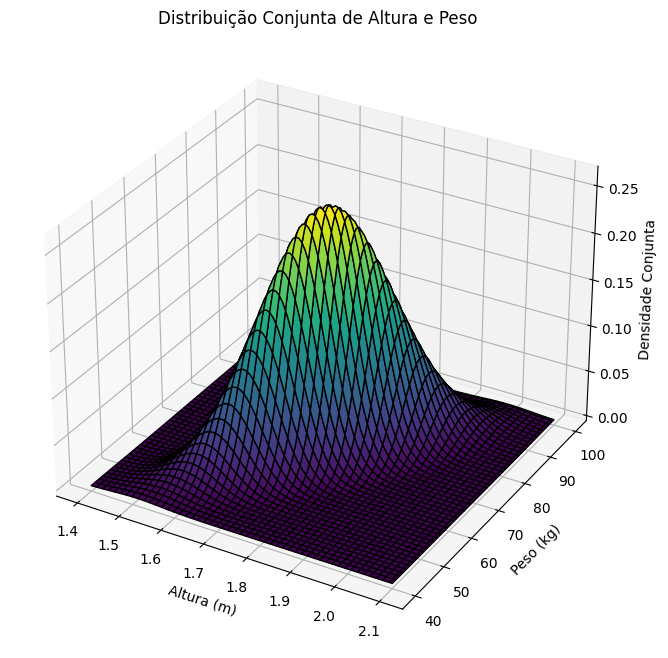

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Parâmetros da distribuição
mu_X = 1.75  # Média para a altura (em metros)
mu_Y = 70    # Média para o peso (em kg)
sigma_X = 0.1  # Desvio padrão para a altura
sigma_Y = 10   # Desvio padrão para o peso
rho = 0.8      # Coeficiente de correlação entre X e Y

# Matriz de covariância
cov_matrix = [[sigma_X**2, rho * sigma_X * sigma_Y], 
              [rho * sigma_X * sigma_Y, sigma_Y**2]]

# Criando uma grade de valores para X (altura) e Y (peso)
x = np.linspace(1.4, 2.1, 100)  # Valores possíveis para altura
y = np.linspace(40, 100, 100)   # Valores possíveis para peso
X, Y = np.meshgrid(x, y)

# Empacotando os valores de X e Y para usar na distribuição normal multivariada
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

# Criando a distribuição normal multivariada
rv = multivariate_normal([mu_X, mu_Y], cov_matrix)

# Calculando a função densidade de probabilidade conjunta
Z = rv.pdf(pos)

# Plotando a distribuição conjunta
fig = plt.figure(figsize=(10, 8))
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='k')

# Ajustes no gráfico
ax.set_xlabel('Altura (m)')
ax.set_ylabel('Peso (kg)')
ax.set_zlabel('Densidade Conjunta')
ax.set_title('Distribuição Conjunta de Altura e Peso')

plt.show()


# Distribuições Marginais

Distribuição Conjunta (X, Y):
[[0.1  0.2  0.1 ]
 [0.1  0.2  0.1 ]
 [0.05 0.05 0.05]]

Distribuição Marginal de X:
P(X=0) = 0.4
P(X=1) = 0.4
P(X=2) = 0.15000000000000002

Distribuição Marginal de Y:
P(Y=0) = 0.25
P(Y=1) = 0.45
P(Y=2) = 0.25


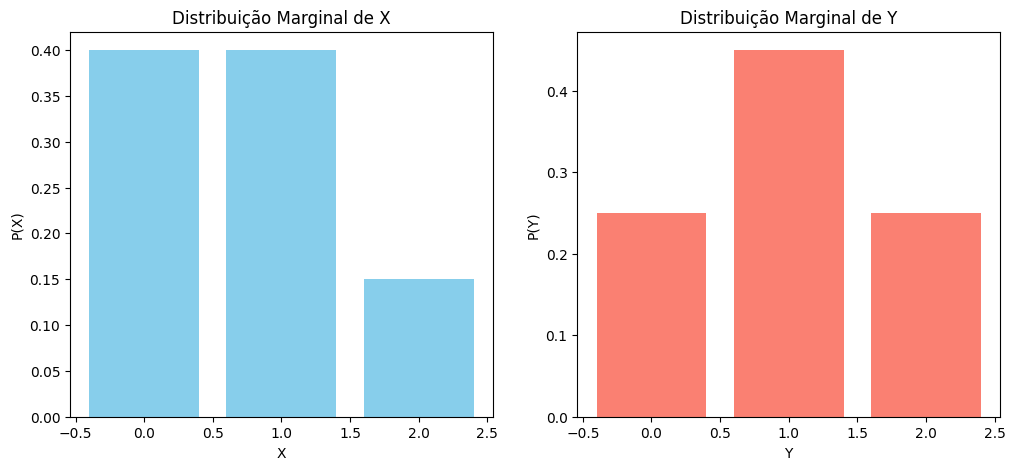

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Definindo o espaço amostral e as probabilidades conjuntas
# Vamos usar 0, 1 e 2 para representar o número de caras ou coroas
espaco_amostral = [0, 1, 2]
prob_conjunta = np.array([
    [0.1, 0.2, 0.1],  # P(X=0, Y=0), P(X=0, Y=1), P(X=0, Y=2)
    [0.1, 0.2, 0.1],  # P(X=1, Y=0), P(X=1, Y=1), P(X=1, Y=2)
    [0.05, 0.05, 0.05]  # P(X=2, Y=0), P(X=2, Y=1), P(X=2, Y=2)
])

# Calculando a distribuição marginal de X somando ao longo das colunas
marginal_X = np.sum(prob_conjunta, axis=1)

# Calculando a distribuição marginal de Y somando ao longo das linhas
marginal_Y = np.sum(prob_conjunta, axis=0)

# Exibindo as distribuições
print("Distribuição Conjunta (X, Y):")
print(prob_conjunta)

print("\nDistribuição Marginal de X:")
for i, prob in enumerate(marginal_X):
    print(f"P(X={espaco_amostral[i]}) = {prob}")

print("\nDistribuição Marginal de Y:")
for i, prob in enumerate(marginal_Y):
    print(f"P(Y={espaco_amostral[i]}) = {prob}")

# Visualizando as distribuições marginais
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(espaco_amostral, marginal_X, color='skyblue')
plt.title("Distribuição Marginal de X")
plt.xlabel("X")
plt.ylabel("P(X)")

plt.subplot(1, 2, 2)
plt.bar(espaco_amostral, marginal_Y, color='salmon')
plt.title("Distribuição Marginal de Y")
plt.xlabel("Y")
plt.ylabel("P(Y)")

plt.show()


O código a seguir produz e imprime a matriz de covariância, que é uma forma de quantificar a dependência linear entre as duas variáveis aleatórias.

In [5]:
# Cálculo da matriz de covariância
cov_matrix = np.cov(X, Y)
print(f"Matriz de Covariância:\n{cov_matrix}")

Matriz de Covariância:
[[0.95886385 1.87826821]
 [1.87826821 4.67253268]]
